In [1]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

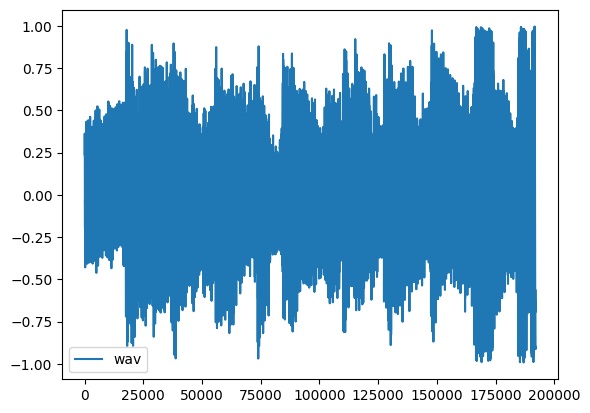

In [2]:
AUDIO_PATH = '/home/yytung/projects/test_audiobox/gao.wav'
wav, sr = sf.read(AUDIO_PATH)
wav = np.mean(wav, axis=1)
wav = wav[sr*15:sr*19]
ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## Compressor

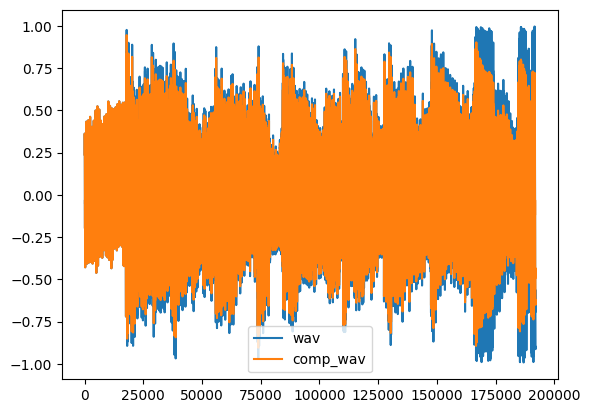

In [3]:
from diffFx_pytorch.processors.dynamics.compressor import Compressor
COMP_DSP_PARAMS = {
    'threshold_db': -5.0,
    'ratio': 5.0,
    'knee_db': 1.0,
    'attack_ms': 20.0,
    'release_ms': 1000.0,
    'makeup_db': 0.0
}

Processor = Compressor(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
comp_wav = Processor(test_wav, None, COMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=comp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(comp_wav.squeeze().cpu().numpy(),      label='comp_wav')
plt.legend()

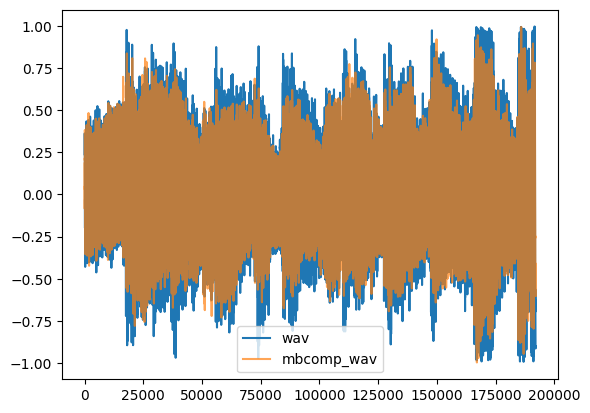

In [4]:
from diffFx_pytorch.processors.dynamics.compressor import MultiBandCompressor
MBCOMP_DSP_PARAMS = {
    'band0_threshold_db': -5.0,  # Low band
    'band0_ratio': 5.0,
    'band0_knee_db': 2.0,
    'band0_attack_ms': 10.0,
    'band0_release_ms': 100.0,
    'band0_makeup_db': 0.0,
    'band1_threshold_db': -35.0,  # Mid band
    'band1_ratio': 20.0,
    'band1_knee_db': 6.0,
    'band1_attack_ms': 20.0,
    'band1_release_ms': 500.0,
    'band1_makeup_db': 0.0,
    'band2_threshold_db': -5.0,  # High band
    'band2_ratio': 5.0,
    'band2_knee_db': 6.0,
    'band2_attack_ms': 1.0,
    'band2_release_ms': 200.0,
    'band2_makeup_db': 0.0,
    'crossover0_freq': 400.0,     # Low-Mid split
    'crossover1_freq': 1000.0     # Mid-High split
}   

Processor = MultiBandCompressor(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
mbcomp_wav = Processor(test_wav, None, MBCOMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=mbcomp_wav.squeeze().cpu().numpy(), rate=sr, normalize=True))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(mbcomp_wav.squeeze().cpu().numpy(),    alpha=0.7,  label='mbcomp_wav')
plt.legend()

## Limiter

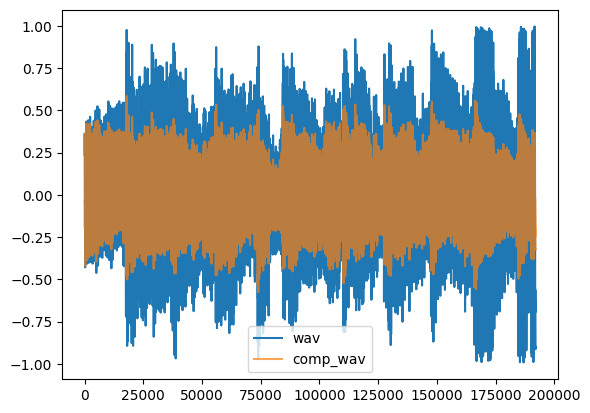

In [15]:
from diffFx_pytorch.processors.dynamics.limiter import Limiter
COMP_DSP_PARAMS = {
    'threshold_db': -10.0,
    'ratio': 1000.0,
    'knee_db': 2.0,
    'attack_ms': 10.0,
    'release_ms': 1000.0,
    'makeup_db': 0.0
}

Processor = Limiter(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda') 
comp_wav = Processor(test_wav, None, COMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=comp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(comp_wav.squeeze().cpu().numpy(),  alpha=0.7, label='comp_wav')
plt.legend()

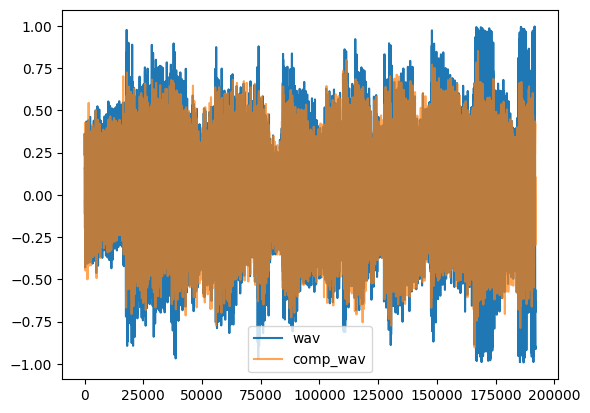

In [17]:
from diffFx_pytorch.processors.dynamics.limiter import MultiBandLimiter
COMP_DSP_PARAMS = {
    'band0_threshold_db': -10.0,   # Low band
    'band0_ratio': 100.0,
    'band0_knee_db': 0.1,
    'band0_attack_ms': 0.1,
    'band0_release_ms': 50.0,
    'band0_makeup_db': 0.0,
    'band1_threshold_db': -10.0,   # Mid band
    'band1_ratio': 100.0,
    'band1_knee_db': 0.1,
    'band1_attack_ms': 0.1,
    'band1_release_ms': 30.0,
    'band1_makeup_db': 0.0,
    'band2_threshold_db': -10.0,   # High band
    'band2_ratio': 100.0,
    'band2_knee_db': 0.1,
    'band2_attack_ms': 0.1,
    'band2_release_ms': 20.0,
    'band2_makeup_db': 0.0,
    'crossover0_freq': 200.0,     # Low-Mid split
    'crossover1_freq': 2000.0     # Mid-High split
}

Processor = MultiBandLimiter(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
comp_wav = Processor(test_wav, None, COMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=comp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(comp_wav.squeeze().cpu().numpy(),  alpha=0.7, label='comp_wav')
plt.legend()

## Expander

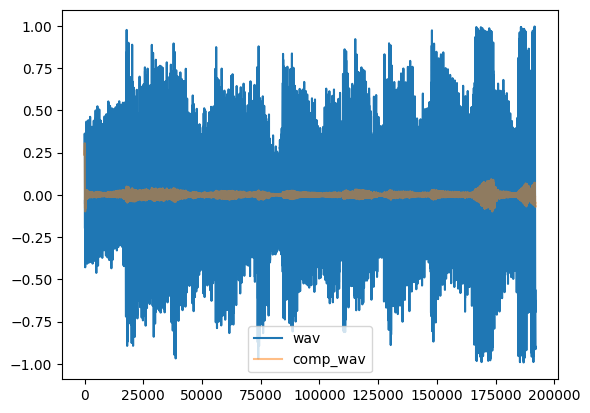

In [5]:
from diffFx_pytorch.processors.dynamics.expander import Expander
COMP_DSP_PARAMS = {
    'threshold_db': 0.0,
    'ratio': 1000.0,  
    'knee_db': 1.0,
    'attack_ms': 10,
    'release_ms': 200.0,
    'makeup_db': 0.0
}

Processor = Expander(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
comp_wav = Processor(test_wav, None, COMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=comp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(comp_wav.squeeze().cpu().numpy(),  alpha=0.5, label='comp_wav')
plt.legend()

## Noise Gate

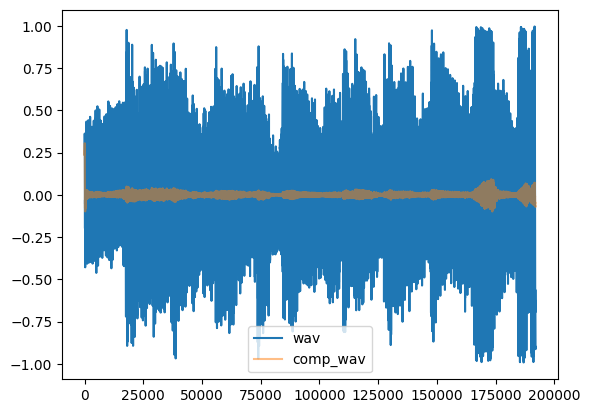

In [4]:
from diffFx_pytorch.processors.dynamics.noisegate import NoiseGate
COMP_DSP_PARAMS = {
    'threshold_db': 0.0,
    'ratio': 1000.0,  
    'knee_db': 1.0,
    'attack_ms': 10,
    'release_ms': 200.0,
}

Processor = NoiseGate(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
comp_wav = Processor(test_wav, None, COMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=comp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(comp_wav.squeeze().cpu().numpy(),  alpha=0.5, label='comp_wav')
plt.legend()

## DeEsser

/home/yytung/miniconda3/envs/diffFx/lib/python3.10/site-packages/IPython/lib/display.py:188: RuntimeWarning: invalid value encountered in cast
  return scaled.astype("<h").tobytes(), nchan


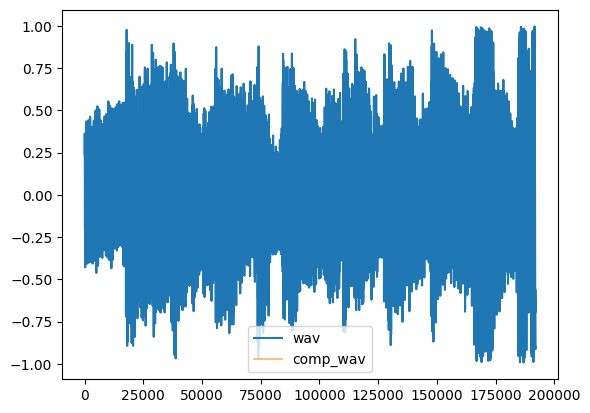

In [ ]:
# from diffFx_pytorch.processors.dynamics import DeEsser
# COMP_DSP_PARAMS = {
#     # Detection parameters
#     'detect_freq': 2000.0,  # Detection frequency
#     'detect_q': 0.5,           # Detection bandwidth
    
#     # Compression parameters
#     'threshold_db': -60.0,     # Sibilance threshold
#     'ratio': 1.0,             # Compression ratio
#     'attack_ms': 0.1,         # Fast attack for sibilants
#     'release_ms': 10.0,      # Release time
#     'knee_db': 0.0,            # Compression knee
    
#     # Processing parameters
#     'shelf_freq': 3000.0,  # High shelf frequency
#     'shelf_gain_db': -12.0,    # Additional HF reduction
#     'mix': 0.0,                # Dry/wet mix
# }

# Processor = DeEsser(sample_rate=sr).to('cuda')
# test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
# comp_wav = Processor(test_wav, None, COMP_DSP_PARAMS)

# ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
# ipd.display(ipd.Audio(data=comp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

# plt.figure(dpi=100)
# plt.plot(wav,      label='wav')
# plt.plot(comp_wav.squeeze().cpu().numpy(),  alpha=0.5, label='comp_wav')
# plt.legend()